### Name : Shivanka Priyashan
### Index : 190476V

In [54]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt

### Question 01

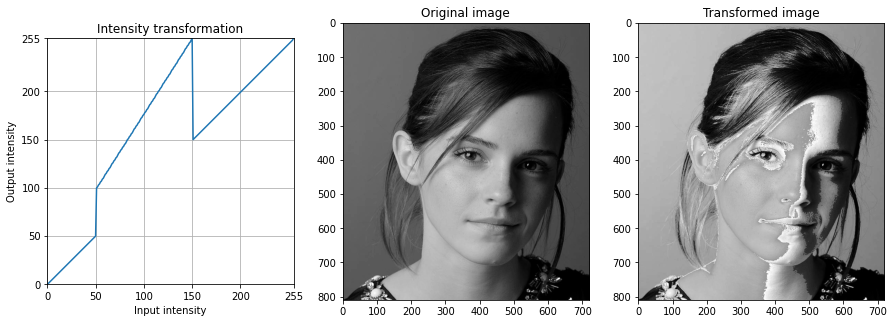

In [55]:
img  = cv.imread(r"D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Assignment 01 - Intensity transformation and neighborhood filtering/emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None 

t1 = np.linspace(0,50,51)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,105)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
#assert len(t)==256

fig, ax = plt.subplots(1,3,figsize=(15,15))

ax[0].plot(t)
ax[0].set_title("Intensity transformation")
ax[0].set_aspect('equal')
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")

ax[0].set_xlim(0,255)
ax[0].set_xticks([0,50,100,150,200,255])

ax[0].set_ylim(0,255)
ax[0].set_yticks([0,50,100,150,200,255])
g = cv.LUT(img,t)

ax[1].set_title("Original image")
ax[1].imshow(img,cmap='gray')

ax[2].set_title("Transformed image")
ax[2].imshow(g,cmap='gray')

plt.show()

### Question 02

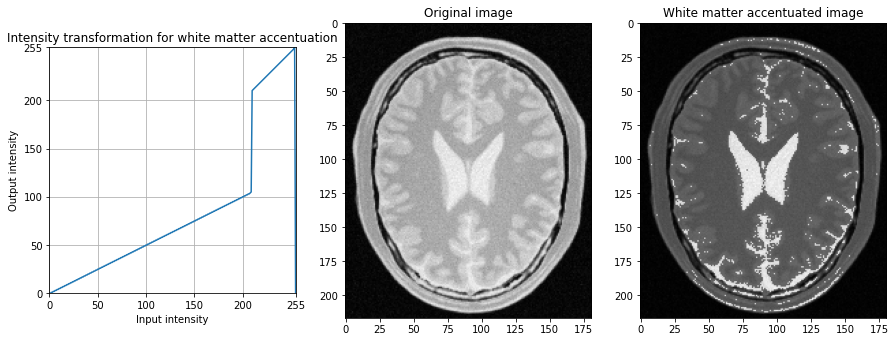

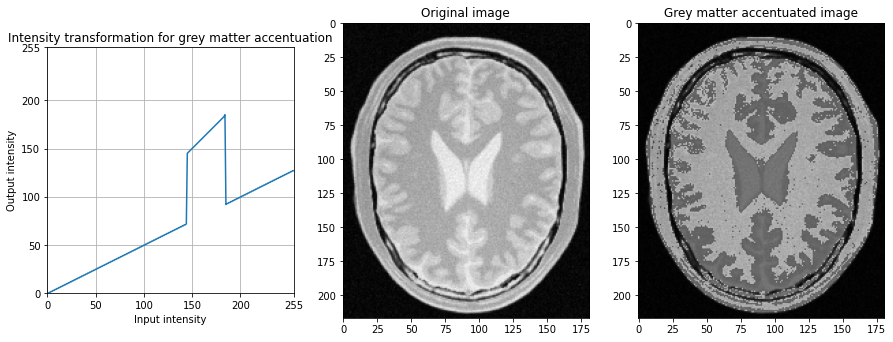

In [56]:
img = cv.imread(r"D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Assignment 01 - Intensity transformation and neighborhood filtering/brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert img is not None

#white matter
white_start = 210
white_end = 255

t1 = np.linspace(0,white_start/2,white_start)
t2 = np.linspace(white_start,white_end,white_end - white_start)
r = 256-(white_end)
t3 = np.linspace(0,0,r)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256

fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].plot(t)
ax[0].set_title("Intensity transformation for white matter accentuation")
ax[0].set_aspect('equal')
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")

ax[0].set_xlim(0,255)
ax[0].set_xticks([0,50,100,150,200,255])

ax[0].set_ylim(0,255)
ax[0].set_yticks([0,50,100,150,200,255])
g = cv.LUT(img,t)

ax[1].set_title("Original image")
ax[1].imshow(img,cmap='gray',vmin=0, vmax=255)

ax[2].set_title("White matter accentuated image")
ax[2].imshow(g,cmap='gray',vmin=0, vmax=255)

#grey matter
grey_start = 145
grey_end = 185

t1 = np.linspace(0,grey_start/2,grey_start)
t2 = np.linspace(grey_start,grey_end,grey_end - grey_start)
r = 256-(grey_end)
t3 = np.linspace(grey_end/2,255/2,r)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
assert len(t)==256

fig, ax = plt.subplots(1,3,figsize=(15,15))

ax[0].plot(t)
ax[0].set_title("Intensity transformation for grey matter accentuation")
ax[0].set_aspect('equal')
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")

ax[0].set_xlim(0,255)
ax[0].set_xticks([0,50,100,150,200,255])

ax[0].set_ylim(0,255)
ax[0].set_yticks([0,50,100,150,200,255])
g = cv.LUT(img,t)

ax[1].set_title("Original image")
ax[1].imshow(img,cmap='gray',vmin=0, vmax=255)

ax[2].set_title("Grey matter accentuated image")
ax[2].imshow(g,cmap='gray',vmin=0, vmax=255)

plt.show()


### Question 03

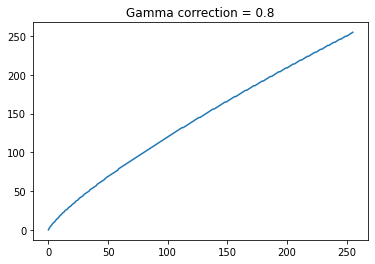

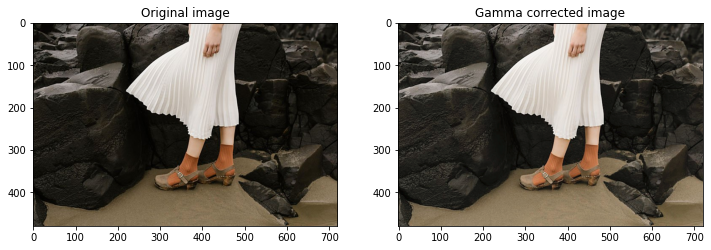

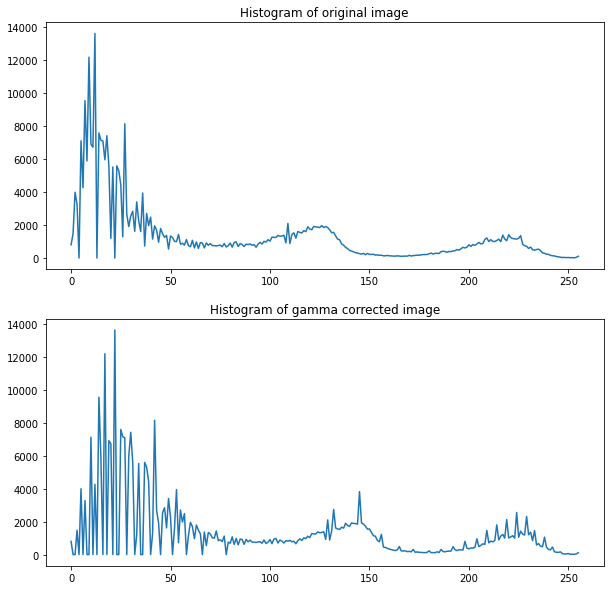

In [57]:
img = cv.imread(r"D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Assignment 01 - Intensity transformation and neighborhood filtering/highlights_and_shadows.jpg",cv.IMREAD_COLOR)
assert img is not None
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

img_lab_original = cv.cvtColor(img,cv.COLOR_RGB2Lab)
(L,a,b) = cv.split(img_lab_original)
g_val = 0.8

t = np.array([(p/255)**g_val*255 for p in range(0,256)]).astype(np.uint8)
L_transformed = cv.LUT(L,t)

img_lab = cv.merge([L_transformed,a,b])
img_rgb = cv.cvtColor(img_lab,cv.COLOR_Lab2RGB)

fig, ax  = plt.subplots()
ax.plot(t)
ax.set_title("Gamma correction = 0.8")

fig, ax = plt.subplots(1,2,figsize=(12,12))

ax[0].imshow(img)
ax[0].set_title("Original image")

ax[1].imshow(img_rgb)
ax[1].set_title("Gamma corrected image")

hist_1 = cv.calcHist([L],[0],None,[256],[0,256])
hist_2 = cv.calcHist([L_transformed],[0],None,[256],[0,256])

fig, ax = plt.subplots(2,1,figsize=(10,10))

ax[0].plot(hist_1)
ax[0].set_title("Histogram of original image")

ax[1].plot(hist_2)
ax[1].set_title("Histogram of gamma corrected image")

plt.show()

### Question 04

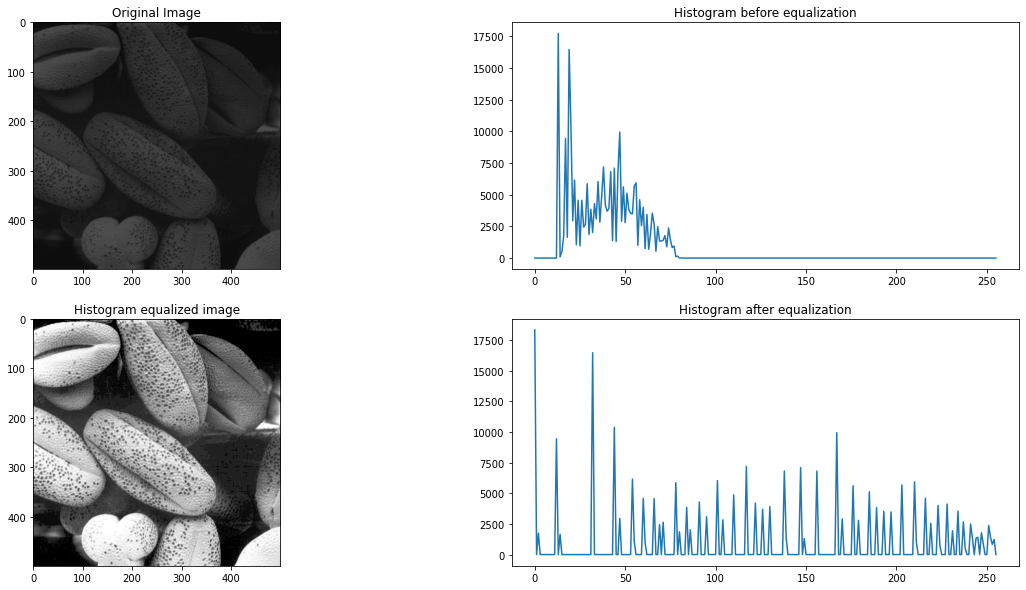

In [58]:
src = cv.imread(r"D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Assignment 01 - Intensity transformation and neighborhood filtering/shells.png",cv.IMREAD_GRAYSCALE)
assert src is not None

def hist_eq(img: np.ndarray):
    hist_orig, bins = np.histogram(img.flatten(), 256, [0, 255])
    cdf = hist_orig.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0)
    img_eq = cdf[img.astype('uint8')]
    hist_eq, bins2 = np.histogram(img_eq.flatten(), 256, [0, 256])

    return img_eq, hist_orig, hist_eq

img_eq, hist_orig, hist_eq = hist_eq(src)

fig, ax = plt.subplots(2,2,figsize=(20,10))

ax[0][0].imshow(src,cmap='gray',vmin = 0, vmax = 255)
ax[0][0].set_title("Original Image")

ax[0][1].plot(hist_orig)
ax[0][1].set_title("Histogram before equalization")

ax[1][0].imshow(img_eq,cmap='gray',vmin = 0, vmax = 255)
ax[1][0].set_title("Histogram equalized image")

ax[1][1].plot(hist_eq)
ax[1][1].set_title("Histogram after equalization")

plt.show()




### Question 05

#### (a)

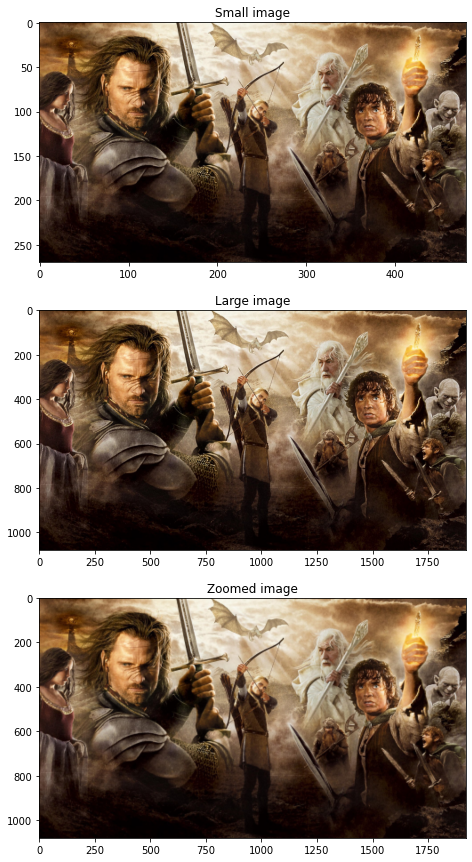

In [8]:
#Zoomed image using nearest-neighbor method

def zoomNearestNeighbor(im,scale):
    '''Returns input image zooomed in the same color space '''
    rows = int(im.shape[0]*scale)
    cols = int(im.shape[1]*scale)
    zoomed_image = np.zeros((rows,cols,3),dtype=im.dtype)

    for i in range(0,rows):
        for j in range(0,cols):
            for k in range(3):
                zoomed_image[i,j,k] = im[int(i/scale),int(j/scale),k]

    return zoomed_image

src_small = cv.imread(r"D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Assignment 01 - Intensity transformation and neighborhood filtering/a1q5images/a1q5images/im01small.png",cv.IMREAD_COLOR)
src_large = cv.imread(r"D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Assignment 01 - Intensity transformation and neighborhood filtering/a1q5images/a1q5images/im01.png",cv.IMREAD_COLOR)
assert src_small is not None
assert src_large is not None 

img_small_RGB = cv.cvtColor(src_small,cv.COLOR_BGR2RGB)
img_large_RGB = cv.cvtColor(src_large,cv.COLOR_BGR2RGB)
img_zoomed_RGB = zoomNearestNeighbor(img_small_RGB,4)

fig, ax = plt.subplots(3,1,figsize=(15,15))

ax[0].imshow(img_small_RGB)
ax[0].set_title("Small image")

ax[1].imshow(img_large_RGB)
ax[1].set_title("Large image")

ax[2].imshow(img_zoomed_RGB)
ax[2].set_title("Zoomed image")

plt.show()

#### (b)

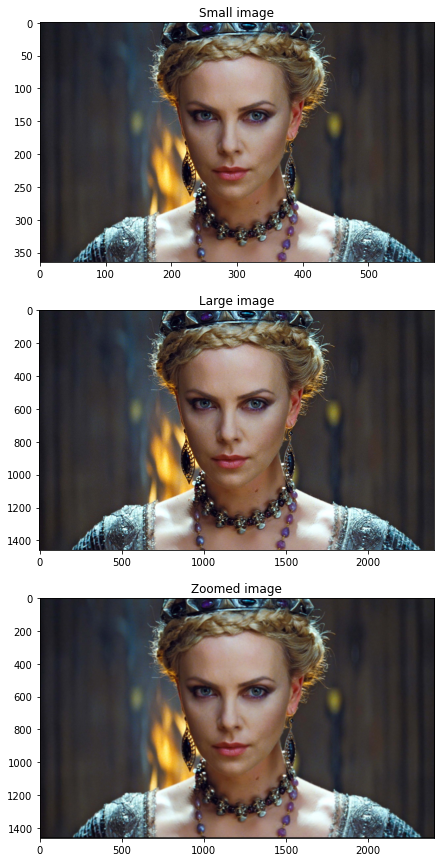

In [9]:
import math
#bilinear interpolation

def zoomBilinearInterpolation(im,scale):
    '''Returns input image zooomed in the same color space '''
    rows = int(im.shape[0]*scale)
    cols = int(im.shape[1]*scale)
    ##im = np.pad(im,1,mode="edge")
    zoomed_image = np.zeros((rows,cols,3),dtype=im.dtype)
    

    for i in range(0,rows-4):
        for j in range(0,cols-4):
            for k in range(3):
                row_ratio = i/scale - math.floor(i/scale)
                col_ratio = j/scale - math.floor(j/scale)
                ul = im[math.floor(i/scale),math.floor(j/scale),k]  
                ll = im[math.ceil(i/scale),math.floor(j/scale),k]
                ur = im[math.floor(i/scale),math.ceil(j/scale),k]
                lr = im[math.ceil(i/scale),math.ceil(j/scale),k]
                avg_pixel = int((ul*(1-col_ratio) + ur*col_ratio)*(1-row_ratio) + (ll*(1-col_ratio) + lr*col_ratio)*(row_ratio))
                zoomed_image[i,j,k] = avg_pixel
                
    return zoomed_image

src_small = cv.imread(r"D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Assignment 01 - Intensity transformation and neighborhood filtering/a1q5images/a1q5images/im03small.png",cv.IMREAD_COLOR)
src_large = cv.imread(r"D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Assignment 01 - Intensity transformation and neighborhood filtering/a1q5images/a1q5images/im03.png",cv.IMREAD_COLOR)
assert src_small is not None
assert src_large is not None

img_small_RGB = cv.cvtColor(src_small,cv.COLOR_BGR2RGB)
img_large_RGB = cv.cvtColor(src_large,cv.COLOR_BGR2RGB)
img_zoomed_RGB = zoomBilinearInterpolation(img_small_RGB,4)

fig, ax = plt.subplots(3,1,figsize=(15,15))

ax[0].imshow(img_small_RGB)
ax[0].set_title("Small image")

ax[1].imshow(img_large_RGB)
ax[1].set_title("Large image")

ax[2].imshow(img_zoomed_RGB)
ax[2].set_title("Zoomed image")

plt.show()


### Question 06

#### (a)

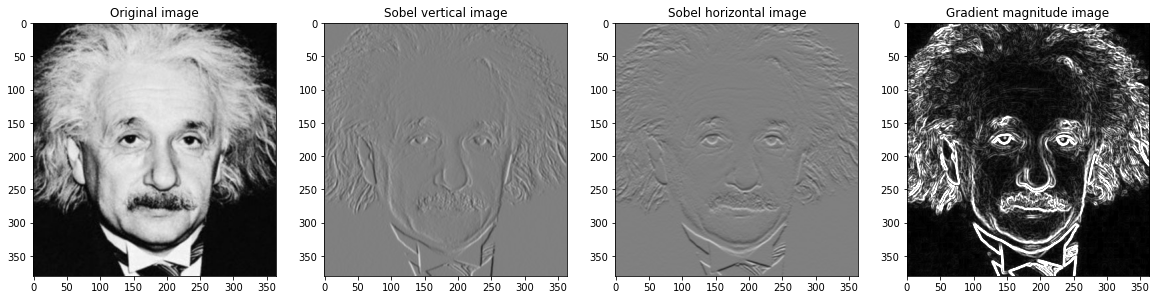

In [59]:
src = cv.imread(r"D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Assignment 01 - Intensity transformation and neighborhood filtering/einstein.png",cv.IMREAD_GRAYSCALE).astype(dtype=np.float32)
assert src is not None

sobel_horizontal = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=float)
sobel_vertical = sobel_horizontal.transpose()

f_image1 = cv.filter2D(src,-1,sobel_vertical)  
f_image2 = cv.filter2D(src,-1,sobel_horizontal)
grad = np.sqrt(f_image1**2  + f_image2**2)

fig, ax = plt.subplots(1,4,figsize=(20,20))


ax[0].imshow(src,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("Original image")

ax[1].imshow(f_image1,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title("Sobel vertical image")

ax[2].imshow(f_image2,cmap='gray',vmin=-1020,vmax=1020)
ax[2].set_title("Sobel horizontal image")

ax[3].imshow(grad,cmap='gray',vmin=0, vmax=255)
ax[3].set_title("Gradient magnitude image")

plt.show()

#### (b)

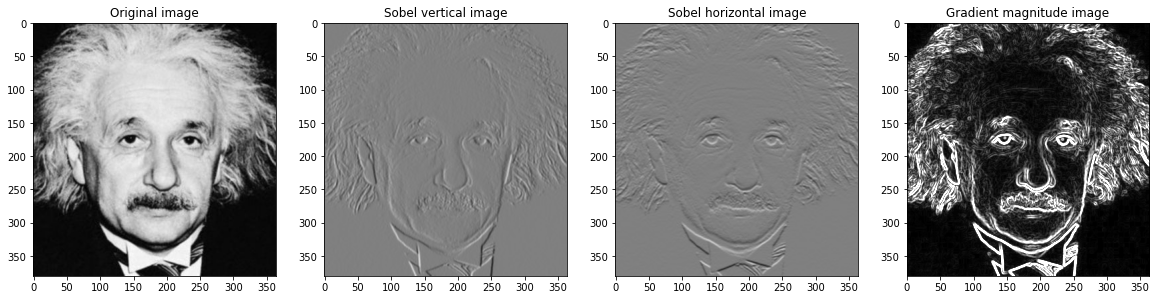

In [62]:
def sobel_filter(img,kernel):
    rows, cols = img.shape[0], img.shape[1]
    h, w = kernel.shape[0], kernel.shape[1]

    pad = (w - 1) // 2

    img = cv.copyMakeBorder(img,pad,pad,pad,pad,cv.BORDER_REPLICATE)

    output = np.zeros((rows,cols),dtype=img.dtype)

    for i in np.arange(pad, rows + pad):
        for j in np.arange(pad, cols + pad):
            roi = img[i-pad:i+pad+1,j-pad:j+pad+1]
            val = (roi*kernel).sum()
            output[i-pad,j-pad] = val

    return output

my_fimage1 = sobel_filter(src,sobel_vertical)
my_fimage2 = sobel_filter(src,sobel_horizontal)
grad = np.sqrt(my_fimage1**2  + my_fimage2**2)

fig, ax = plt.subplots(1,4,figsize=(20,20))

ax[0].imshow(src,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("Original image")

ax[1].imshow(my_fimage1,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title("Sobel vertical image")

ax[2].imshow(my_fimage2,cmap='gray',vmin=-1020,vmax=1020)
ax[2].set_title("Sobel horizontal image")

ax[3].imshow(grad,cmap='gray',vmin=0, vmax=255)
ax[3].set_title("Gradient magnitude image")

plt.show()


#### (c)

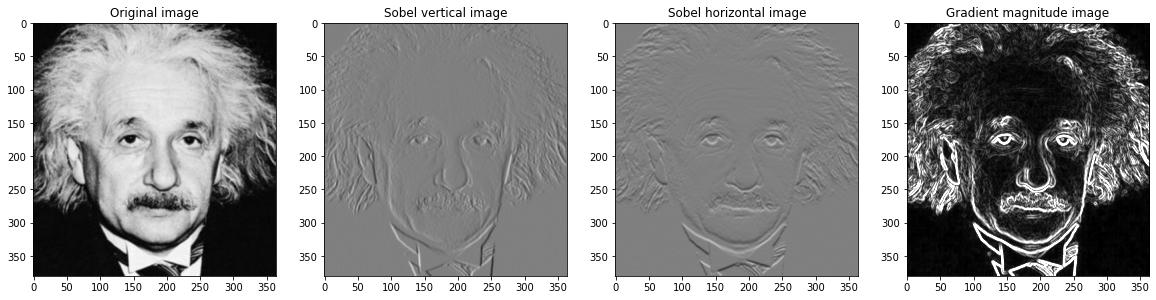

In [64]:
#sobel vertical using commutative property
arr1 = np.array([[1],[2],[1]])
arr2 = np.array([[-1,0,1]])
result_1 = cv.filter2D(src,-1,arr2)
result_1 = cv.filter2D(result_1,-1,arr1)

#sobel horizontal using commutative property
arr3 = np.array([1,2,1])
arr4 = np.array([[-1],[0],[1]])
result_2 = cv.filter2D(src,-1,arr4)
result_2 = cv.filter2D(result_2,-1,arr3)

grad = np.sqrt(result_1**2  + result_2**2)

fig, ax = plt.subplots(1,4,figsize=(20,20))

ax[0].imshow(src,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("Original image")

ax[1].imshow(result_1,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_title("Sobel vertical image")

ax[2].imshow(result_2,cmap='gray',vmin=-1020,vmax=1020)
ax[2].set_title("Sobel horizontal image")

ax[3].imshow(grad,cmap='gray',vmin=0, vmax=255)
ax[3].set_title("Gradient magnitude image")

plt.show()

### Question 07

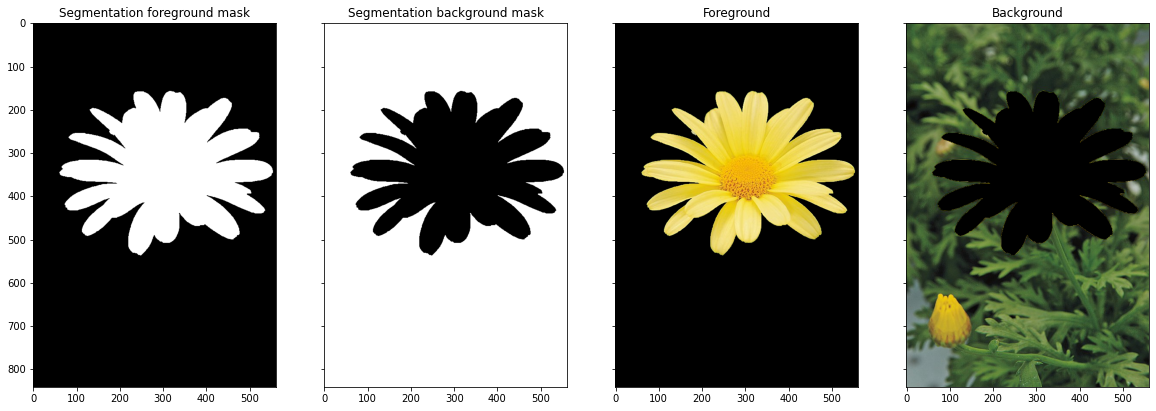

In [52]:
src = cv.imread(r"D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Assignment 01 - Intensity transformation and neighborhood filtering/daisy.jpg",cv.IMREAD_COLOR)
assert src is not None

src_RGB = cv.cvtColor(src,cv.COLOR_BGR2RGB)
mask = np.zeros(src.shape[:2],np.uint8)

fg = np.zeros((1,65),np.float64)
bg = np.zeros((1,65),np.float64)

rect = (50,150,520,400)

cv.grabCut(src,mask,rect,bg,fg,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2) | (mask==0),0,1).astype('uint8')
mask3 = np.where((mask==1) | (mask==3),0,1).astype('uint8')

imgcut = src * mask2[:,:,np.newaxis]
imgback = src * mask3[:,:,np.newaxis]

imgcutRGB = cv.cvtColor(imgcut,cv.COLOR_BGR2RGB)
imgbackRGB = cv.cvtColor(imgback,cv.COLOR_BGR2RGB)

imgbackBlur = cv.GaussianBlur(imgback,(19,19),0)
imgEnhanced = cv.add(imgcut,imgbackBlur)
imgEnhancedRGB = cv.cvtColor(imgEnhanced,cv.COLOR_BGR2RGB)

fig, axes = plt.subplots(1,4,sharex='all',sharey='all',figsize=(20,20))

axes[0].imshow(mask2,cmap='gray')
axes[0].set_title("Segmentation foreground mask")

axes[1].imshow(mask3,cmap='gray')
axes[1].set_title("Segmentation background mask")

axes[2].imshow(imgcutRGB)
axes[2].set_title("Foreground")

axes[3].imshow(imgbackRGB)
axes[3].set_title("Background")

plt.show()



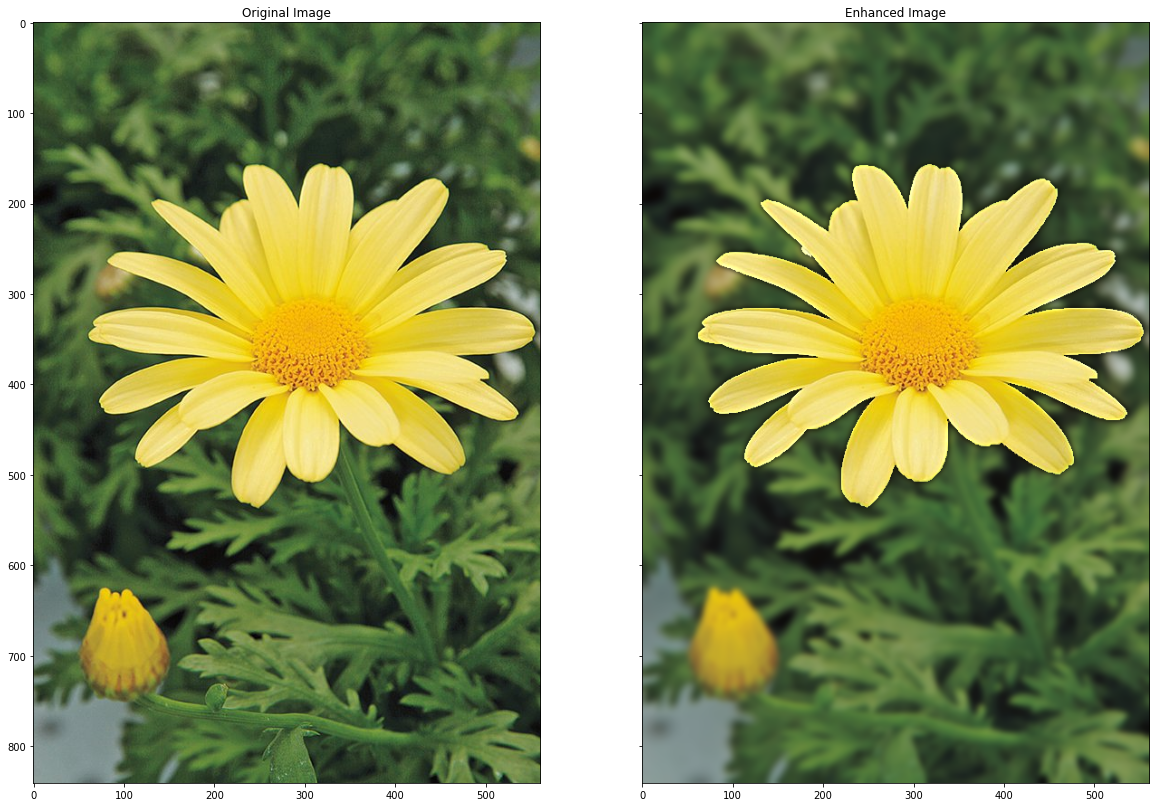

In [50]:
fig, axes = plt.subplots(1,2,sharex='all',sharey='all',figsize=(20,20))

axes[0].imshow(src_RGB)
axes[0].set_title("Original Image")

axes[1].imshow(imgEnhancedRGB)
axes[1].set_title("Enhanced Image")
plt.show()